# Medicare Advantage Star Ratings - Data Exploration
## Phase 1: Understanding the Data

**Project Goal:** Identify which quality measures Medicare Advantage plans should prioritize to maximize their Star Rating improvement.

**Business Impact:** Plans with 4+ stars receive ~$11 billion in annual bonus payments. A 0.5 star improvement = hundreds of millions in revenue.

---

## Setup

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load the Data

In [23]:
from pathlib import Path

data_dir = Path("data") / "raw" / "2024 Star Ratings Data Table - (Jul 2 2024)_0"

# Load files
summary_df = pd.read_csv(data_dir / "2024 Star Ratings Data Table - Summary Rating (Jul 2 2024).csv", encoding='latin-1', skiprows=1)
measure_stars_df = pd.read_csv(data_dir / "2024 Star Ratings Data Table - Measure Stars (Jul 2 2024).csv", encoding='latin-1', skiprows=2)
measure_data_df = pd.read_csv(data_dir / "2024 Star Ratings Data Table - Measure Data (Jul 2 2024).csv", encoding='latin-1', skiprows=2)
part_c_cutpoints_df = pd.read_csv(data_dir / "2024 Star Ratings Data Table - Part C Cut Points (Jul 2 2024).csv", encoding='latin-1', skiprows=1)
part_d_cutpoints_df = pd.read_csv(data_dir / "2024 Star Ratings Data Table - Part D Cut Points (Jul 2 2024).csv", encoding='latin-1', skiprows=1)

# Fix column names for measure_stars_df
measure_stars_df.columns = ['CONTRACT_ID', 'Organization_Type', 'Contract_Name', 'Marketing_Name', 'Parent_Org'] + list(measure_stars_df.columns[5:])

# Remove leftover header rows
measure_stars_df = measure_stars_df[measure_stars_df['CONTRACT_ID'].notna()].reset_index(drop=True)

print("All data loaded and cleaned!")
print(f"Contracts: {len(measure_stars_df)}")

All data loaded and cleaned!
Contracts: 857


## 2. Explore Summary Ratings

Let's see the overall star rating distribution across all contracts.

In [4]:
# Quick peek at the data
summary_df.head()

,Contract Number,Organization Type,Contract Name,Organization Marketing Name,Parent Organization,SNP,2021 Disaster %,2022 Disaster %,2024 Part C Summary,2024 Part D Summary,2024 Overall,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,E3014,Employer/Union Only Direct Contract PDP,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,Commonwealth of PA Pub Schools Retirement System,No,1,3,Not Applicable,4.5,Not Applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H0022,Demo,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio,Centene Corporation,No,0,0,Not Applicable,Not enough data available,Not enough data available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H0028,Local CCP,"CHA HMO, INC.",Humana,Humana Inc.,Yes,41,1,4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H0029,Local CCP,"COORDINATED CARE OF WASHINGTON, INC.",Allwell,Centene Corporation,No,0,0,Not enough data available,Not enough data available,Not enough data available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H0034,Local CCP,"HAMASPIK, INC.","Hamaspik, Inc.","Hamaspik of Rockland County, Inc.",Yes,70,0,Not enough data available,2.5,Not enough data available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# What columns do we have?
print("Columns in Summary Ratings:")
for i, col in enumerate(summary_df.columns, 1):
    print(f"{i:2d}. {col}")

Columns in Summary Ratings:
 1. Contract Number
 2. Organization Type
 3. Contract Name
 4. Organization Marketing Name
 5. Parent Organization
 6. SNP
 7. 2021 Disaster %
 8. 2022 Disaster %
 9. 2024 Part C Summary
10. 2024 Part D Summary
11. 2024 Overall
12. Unnamed: 11
13. Unnamed: 12
14. Unnamed: 13
15. Unnamed: 14
16. Unnamed: 15
17. Unnamed: 16
18. Unnamed: 17
19. Unnamed: 18
20. Unnamed: 19
21. Unnamed: 20
22. Unnamed: 21
23. Unnamed: 22
24. Unnamed: 23
25. Unnamed: 24
26. Unnamed: 25
27. Unnamed: 26
28. Unnamed: 27
29. Unnamed: 28
30. Unnamed: 29
31. Unnamed: 30
32. Unnamed: 31
33. Unnamed: 32
34. Unnamed: 33
35. Unnamed: 34
36. Unnamed: 35
37. Unnamed: 36
38. Unnamed: 37
39. Unnamed: 38
40. Unnamed: 39
41. Unnamed: 40
42. Unnamed: 41
43. Unnamed: 42
44. Unnamed: 43
45. Unnamed: 44
46. Unnamed: 45
47. Unnamed: 46
48. Unnamed: 47
49. Unnamed: 48
50. Unnamed: 49
51. Unnamed: 50
52. Unnamed: 51


In [25]:
# Star rating distribution
rating_counts = summary_df['2024 Overall'].value_counts().sort_index()

print("STAR RATING DISTRIBUTION")
print("=" * 50)
total = len(summary_df)

for rating, count in rating_counts.items():
    pct = (count / total) * 100
    bar = '█' * int(pct / 2)
    print(f"{rating} stars: {count:3d} ({pct:5.1f}%) {bar}")

print(f"\nTotal contracts: {total}")

STAR RATING DISTRIBUTION
2 stars:   4 (  0.5%) 
2.5 stars:  32 (  3.7%) █
3 stars: 126 ( 14.7%) ███████
3.5 stars: 141 ( 16.5%) ████████
4 stars: 122 ( 14.2%) ███████
4.5 stars:  82 (  9.6%) ████
5 stars:  38 (  4.4%) ██
Not Applicable stars:  64 (  7.5%) ███
Not enough data available stars: 155 ( 18.1%) █████████
Plan too new to be measured stars:  93 ( 10.9%) █████

Total contracts: 857


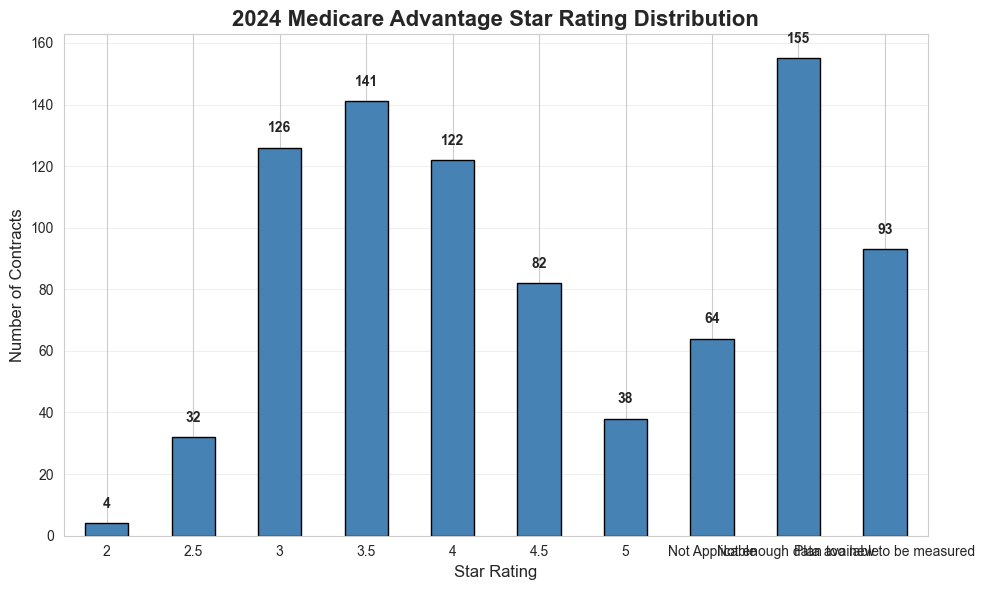

In [7]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('2024 Medicare Advantage Star Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Number of Contracts', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(rating_counts):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Key Question: Who Gets Bonus Payments?

Plans with **4.0+ stars** receive Quality Bonus Payments. Let's calculate this.

In [26]:
# Convert ratings to numeric (text values like "Not enough data" become NaN)
summary_df['2024 Overall'] = pd.to_numeric(summary_df['2024 Overall'], errors='coerce')

# Bonus eligibility analysis
bonus_eligible = summary_df[summary_df['2024 Overall'] >= 4.0]
five_star = summary_df[summary_df['2024 Overall'] == 5.0]
near_bonus = summary_df[(summary_df['2024 Overall'] >= 3.5) & (summary_df['2024 Overall'] < 4.0)]

print("BONUS PAYMENT ELIGIBILITY")
print("=" * 50)
print(f"Bonus Eligible (4+ stars): {len(bonus_eligible)} / {total} ({len(bonus_eligible)/total*100:.1f}%)")
print(f"5-Star Plans: {len(five_star)} / {total} ({len(five_star)/total*100:.1f}%)")
print(f"\nNear Bonus (3.5-3.99 stars): {len(near_bonus)} plans")
print(f"   → These are prime targets for 0.5 star improvement!")

BONUS PAYMENT ELIGIBILITY
Bonus Eligible (4+ stars): 242 / 857 (28.2%)
5-Star Plans: 38 / 857 (4.4%)

Near Bonus (3.5-3.99 stars): 141 plans
   → These are prime targets for 0.5 star improvement!


## 3. Explore Measure Performance

Now let's see which quality measures are hardest for plans to achieve.

In [9]:
# Preview measure stars data
measure_stars_df.head()

,CONTRACT_ID,Organization_Type,Contract_Name,Marketing_Name,Parent_Org,C01: Breast Cancer Screening,C02: Colorectal Cancer Screening,C03: Annual Flu Vaccine,C04: Monitoring Physical Activity,C05: Special Needs Plan (SNP) Care Management,C06: Care for Older Adults  Medication Review,C07: Care for Older Adults  Pain Assessment,C08: Osteoporosis Management in Women who had a Fracture,C09: Diabetes Care  Eye Exam,C10: Diabetes Care  Blood Sugar Controlled,C11: Controlling High Blood Pressure,C12: Reducing the Risk of Falling,C13: Improving Bladder Control,C14: Medication Reconciliation Post-Discharge,C15: Plan All-Cause Readmissions,C16: Statin Therapy for Patients with Cardiovascular Disease,C17: Transitions of Care,C18: Follow-up after Emergency Department Visit for People with Multiple High-Risk Chronic Conditions,C19: Getting Needed Care,C20: Getting Appointments and Care Quickly,C21: Customer Service,C22: Rating of Health Care Quality,C23: Rating of Health Plan,C24: Care Coordination,C25: Complaints about the Health Plan,C26: Members Choosing to Leave the Plan,C27: Health Plan Quality Improvement,C28: Plan Makes Timely Decisions about Appeals,C29: Reviewing Appeals Decisions,C30: Call Center  Foreign Language Interpreter and TTY Availability,D01: Call Center  Foreign Language Interpreter and TTY Availability,D02: Complaints about the Drug Plan,D03: Members Choosing to Leave the Plan,D04: Drug Plan Quality Improvement,D05: Rating of Drug Plan,D06: Getting Needed Prescription Drugs,D07: MPF Price Accuracy,D08: Medication Adherence for Diabetes Medications,D09: Medication Adherence for Hypertension (RAS antagonists),D10: Medication Adherence for Cholesterol (Statins),D11: MTM Program Completion Rate for CMR,D12: Statin Use in Persons with Diabetes (SUPD),Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,E3014,Employer/Union Only Direct Contract PDP,PSERS HOP PROGRAM,Pennsylvania Public School Employees Retiremen...,Commonwealth of PA Pub Schools Retirement System,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Plan not required to report measure,Not enough data available,5,Not enough data available,4,5,5,Not enough data available,4,4,4,4,4,NaN,NaN,NaN,NaN
1,H0022,Demo,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio,Centene Corporation,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available,No data available

In [27]:
# First, let's reshape the data from wide to long format
# Get only the measure columns (C01, C02, etc.)
measure_cols = [col for col in measure_stars_df.columns if col.startswith('C') or col.startswith('D')]

# Melt the dataframe to long format
measure_long = measure_stars_df.melt(
    id_vars=['CONTRACT_ID', 'Contract_Name'],
    value_vars=measure_cols,
    var_name='Measure_Name',
    value_name='Star_Rating'
)

# Extract just the measure ID (e.g., "C01" from "C01: Breast Cancer Screening")
measure_long['Measure_ID'] = measure_long['Measure_Name'].str.split(':').str[0]

# Convert star ratings to numeric
measure_long['Star_Rating'] = pd.to_numeric(measure_long['Star_Rating'], errors='coerce')

# Remove rows with no star rating
measure_long = measure_long.dropna(subset=['Star_Rating'])

print(f"Reshaped data: {len(measure_long)} measure records")
print(f"\nSample:")
measure_long.head()

Reshaped data: 22370 measure records

Sample:


,CONTRACT_ID,Contract_Name,Measure_Name,Star_Rating,Measure_ID
2,H0028,"CHA HMO, INC.",C01: Breast Cancer Screening,4.0,C01
5,H0062,"SUPERIOR HEALTHPLAN, INC.",C01: Breast Cancer Screening,3.0,C01
6,H0074,"WELLCARE OF MISSISSIPPI, INC.",C01: Breast Cancer Screening,4.0,C01
8,H0104,BLUE CROSS AND BLUE SHIELD OF ALABAMA,C01: Breast Cancer Screening,4.0,C01
9,H0107,HEALTH CARE SERVICE CORPORATION,C01: Breast Cancer Screening,4.0,C01


In [28]:
# Calculate average star rating per measure
measure_performance = measure_long.groupby('Measure_ID')['Star_Rating'].agg([
    ('avg_stars', 'mean'),
    ('num_plans', 'count'),
    ('std_dev', 'std')
]).round(2)

# Filter to measures with at least 50 plans
measure_performance = measure_performance[measure_performance['num_plans'] >= 50]
measure_performance = measure_performance.sort_values('avg_stars')

print(f"Analyzing {len(measure_performance)} measures with 50+ plans\n")
measure_performance.head(10)

Analyzing 42 measures with 50+ plans



,avg_stars,num_plans,std_dev
Measure_ID,,,
C17,2.49,537,1.19
D12,2.72,665,1.09
C08,2.80,308,1.22
C15,2.89,454,1.12
C12,2.93,417,1.03
C27,2.95,461,1.03
C04,2.97,518,1.11
C18,3.05,545,1.00
C23,3.09,535,1.37


### Worst Performing Measures (Biggest Opportunities)

In [29]:
print("TOP 10 WORST PERFORMING MEASURES")
print("=" * 70)
print("These are where most plans struggle - improvement opportunities!\n")

worst_10 = measure_performance.head(10)
print(worst_10.to_string())

TOP 10 WORST PERFORMING MEASURES
These are where most plans struggle - improvement opportunities!

            avg_stars  num_plans  std_dev
Measure_ID                               
C17              2.49        537     1.19
D12              2.72        665     1.09
C08              2.80        308     1.22
C15              2.89        454     1.12
C12              2.93        417     1.03
C27              2.95        461     1.03
C04              2.97        518     1.11
C18              3.05        545     1.00
C23              3.09        535     1.37
C03              3.13        535     1.35


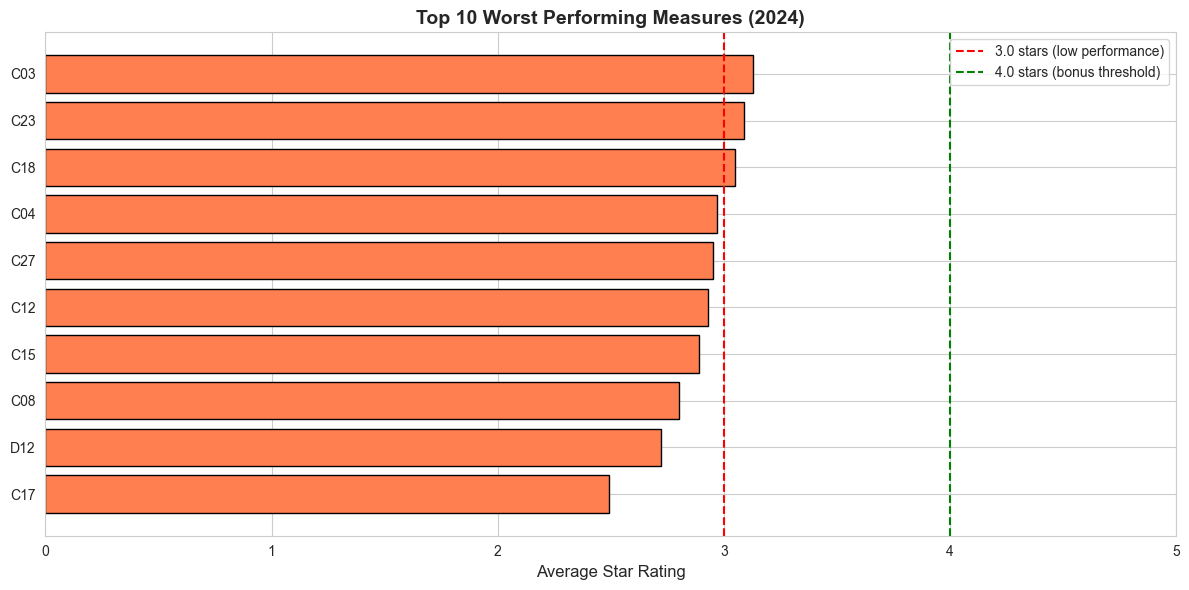

In [13]:
# Visualize worst performers
plt.figure(figsize=(12, 6))
worst_10_sorted = worst_10.sort_values('avg_stars', ascending=True)
plt.barh(range(len(worst_10_sorted)), worst_10_sorted['avg_stars'], color='coral', edgecolor='black')
plt.yticks(range(len(worst_10_sorted)), worst_10_sorted.index)
plt.xlabel('Average Star Rating', fontsize=12)
plt.title('Top 10 Worst Performing Measures (2024)', fontsize=14, fontweight='bold')
plt.xlim(0, 5)
plt.axvline(x=3.0, color='red', linestyle='--', label='3.0 stars (low performance)')
plt.axvline(x=4.0, color='green', linestyle='--', label='4.0 stars (bonus threshold)')
plt.legend()
plt.tight_layout()
plt.show()

### Best Performing Measures

In [31]:
print("TOP 10 BEST PERFORMING MEASURES")
print("=" * 70)

best_10 = measure_performance.tail(10).sort_values('avg_stars', ascending=False)
print(best_10.to_string())

TOP 10 BEST PERFORMING MEASURES
            avg_stars  num_plans  std_dev
Measure_ID                               
C30              4.48        712     0.81
D01              4.43        743     0.85
C28              4.30        435     0.98
D02              4.14        600     1.02
C25              4.11        557     1.04
C06              4.07        319     0.92
C07              4.04        319     1.01
C10              3.77        583     1.00
C01              3.72        506     1.05
C29              3.71        428     0.90


## 4. Analyze Cut Points

Cut points tell us what score you need to achieve each star level. Let's examine these thresholds.

In [15]:
# Preview Part C cut points
part_c_cutpoints_df.head(10)

,Number of Stars Displayed on the Plan Finder Tool,"HD1: Staying Healthy: Screenings, Tests and Vaccines",Unnamed: 2,Unnamed: 3,Unnamed: 4,HD2: Managing Chronic (Long Term) Conditions,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,HD3: Member Experience with Health Plan,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,HD4: Member Complaints and Changes in the Health Plan's Performance,Unnamed: 26,Unnamed: 27,HD5: Health Plan Customer Service,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,C01: Breast Cancer Screening,C02: Colorectal Cancer Screening,C03: Annual Flu Vaccine,C04: Monitoring Physical Activity,C05: Special Needs Plan (SNP) Care Management,C06: Care for Older Adults  Medication Review,C07: Care for Older Adults  Pain Assessment,C08: Osteoporosis Management in Women who had ...,C09: Diabetes Care  Eye Exam,C10: Diabetes Care  Blood Sugar Controlled,C11: Controlling High Blood Pressure,C12: Reducing the Risk of Falling,C13: Improving Bladder Control,C14: Medication Reconciliation Post-Discharge,C15: Plan All-Cause Readmissions,C16: Statin Therapy for Patients with Cardiova...,C17: Transitions of Care,C18: Follow-up after Emergency Department Visi...,C19: Getting Needed Care,C20: Getting Appointments and Care Quickly,C21: Customer Service,C22: Rating of Health Care Quality,C23: Rating of Health Plan,C24: Care Coordination,C25: Complaints about the Health Plan,C26: Members Choosing to Leave the Plan,C27: Health Plan Quality Improvement,C28: Plan Makes Timely Decisions about Appeals,C29: Reviewing Appeals Decisions,C30: Call Center  Foreign Language Interprete...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,01/01/2022  12/31/2022,01/01/2022  12/31/2022,03/2023  06/2023,07/19/2022  11/01/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,07/19/2022  11/01/2022,07/19/2022  11/01/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,03/2023  06/2023,03/2023  06/2023,03/2023  06/2023,03/2023  06/2023,03/2023  06/2023,03/2023  06/2023,01/01/2022  12/31/2022,01/01/2022  12/31/2022,Not Applicable,01/01/2022  12/31/2022,01/01/2022  12/31/2022,02/2023 05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1star,< 48 %,< 48 %,< 63,< 42 %,< 42 %,< 48 %,< 55 %,< 28 %,< 52 %,< 44 %,< 58 %,< 47 %,< 38 %,< 38 %,> 13 %,< 79 %,< 40 %,< 44 %,< 76,< 74,< 88,< 84,< 84,< 83,> 1.46,> 41 %,< -0.262671,< 64 %,< 73 %,< 41 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2star,>= 48 % to < 63 %,>= 48 % to < 60 %,>= 63 to < 67,>= 42 % to < 48 %,>= 42 % to < 57 %,>= 48 % to < 75 %,>= 55 % to < 76 %,>= 28 % to < 40 %,>= 52 % to < 65 %,>= 44 % to < 67 %,>= 58 % to < 68 %,>= 47 % to < 53 %,>= 38 % to < 42 %,>= 38 % to < 52 %,> 11 % to <= 13 %,>= 79 % to < 84 %,>= 40 % to < 52 %,>= 44 % to < 53 %,>= 76 to < 78,>= 74 to < 76,>= 88 to < 89,>= 84 to < 85,>= 84 to < 85,>= 83 to < 84,> 0.83 to <= 1.46,> 29 % to <= 41 %,>= -0.262671 to < 0,>= 64 % to < 80 %,>= 73 % to < 88 %,>= 41 % to < 64 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3star,>= 63 % to < 71 %,>= 60 % to < 71 %,>= 67 to < 74,>= 48 % to < 53 %,>= 57 % to < 74 %,>= 75 % to < 87 %,>= 76 % to < 90 %,>= 40 % to < 50 %,>= 65 % to < 73 %,>= 67 % to < 80 %,>= 68 % to < 74 %,>= 53 % to < 60 %,>= 42 % to < 47 %,>= 52 % to < 68 %,> 10 % to <= 11 %,>= 84 % to < 86 %,>= 52 % to < 64 %,>= 53 % to < 60 %,>= 78 to < 81,>= 76 to < 78,>= 89 to < 90,>= 85 to < 87,>= 85 to < 88,>= 84 to < 86,> 0.44 to <= 0.83,> 18 % to <= 29 %,>= 0 to < 0.190622,>= 80 % to < 90 %,>= 88 % to < 96 %,>= 64 % to < 88 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4star,>= 71 % to < 79 %,>= 71 % to < 80 %,>= 74 to < 78,>=

In [32]:
# Clean up cut points data
part_c_cutpoints_df = pd.read_csv(data_dir / "2024 Star Ratings Data Table - Part C Cut Points (Jul 2 2024).csv", encoding='latin-1', skiprows=2)

# Show the structure
print("Cut Points Columns:")
print(list(part_c_cutpoints_df.columns)[:10])
part_c_cutpoints_df.head()

Cut Points Columns:
['Unnamed: 0', 'C01: Breast Cancer Screening', 'C02: Colorectal Cancer Screening', 'C03: Annual Flu Vaccine', 'C04: Monitoring Physical Activity', 'C05: Special Needs Plan (SNP) Care Management', 'C06: Care for Older Adults \x96 Medication Review', 'C07: Care for Older Adults \x96 Pain Assessment', 'C08: Osteoporosis Management in Women who had a Fracture', 'C09: Diabetes Care \x96 Eye Exam']


,Unnamed: 0,C01: Breast Cancer Screening,C02: Colorectal Cancer Screening,C03: Annual Flu Vaccine,C04: Monitoring Physical Activity,C05: Special Needs Plan (SNP) Care Management,C06: Care for Older Adults  Medication Review,C07: Care for Older Adults  Pain Assessment,C08: Osteoporosis Management in Women who had a Fracture,C09: Diabetes Care  Eye Exam,C10: Diabetes Care  Blood Sugar Controlled,C11: Controlling High Blood Pressure,C12: Reducing the Risk of Falling,C13: Improving Bladder Control,C14: Medication Reconciliation Post-Discharge,C15: Plan All-Cause Readmissions,C16: Statin Therapy for Patients with Cardiovascular Disease,C17: Transitions of Care,C18: Follow-up after Emergency Department Visit for People with Multiple High-Risk Chronic Conditions,C19: Getting Needed Care,C20: Getting Appointments and Care Quickly,C21: Customer Service,C22: Rating of Health Care Quality,C23: Rating of Health Plan,C24: Care Coordination,C25: Complaints about the Health Plan,C26: Members Choosing to Leave the Plan,C27: Health Plan Quality Improvement,C28: Plan Makes Timely Decisions about Appeals,C29: Reviewing Appeals Decisions,C30: Call Center  Foreign Language Interpreter and TTY Availability,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,NaN,01/01/2022  12/31/2022,01/01/2022  12/31/2022,03/2023  06/2023,07/19/2022  11/01/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,07/19/2022  11/01/2022,07/19/2022  11/01/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,01/01/2022  12/31/2022,03/2023  06/2023,03/2023  06/2023,03/2023  06/2023,03/2023  06/2023,03/2023  06/2023,03/2023  06/2023,01/01/2022  12/31/2022,01/01/2022  12/31/2022,Not Applicable,01/01/2022  12/31/2022,01/01/2022  12/31/2022,02/2023 05/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1star,< 48 %,< 48 %,< 63,< 42 %,< 42 %,< 48 %,< 55 %,< 28 %,< 52 %,< 44 %,< 58 %,< 47 %,< 38 %,< 38 %,> 13 %,< 79 %,< 40 %,< 44 %,< 76,< 74,< 88,< 84,< 84,< 83,> 1.46,> 41 %,< -0.262671,< 64 %,< 73 %,< 41 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2star,>= 48 % to < 63 %,>= 48 % to < 60 %,>= 63 to < 67,>= 42 % to < 48 %,>= 42 % to < 57 %,>= 48 % to < 75 %,>= 55 % to < 76 %,>= 28 % to < 40 %,>= 52 % to < 65 %,>= 44 % to < 67 %,>= 58 % to < 68 %,>= 47 % to < 53 %,>= 38 % to < 42 %,>= 38 % to < 52 %,> 11 % to <= 13 %,>= 79 % to < 84 %,>= 40 % to < 52 %,>= 44 % to < 53 %,>= 76 to < 78,>= 74 to < 76,>= 88 to < 89,>= 84 to < 85,>= 84 to < 85,>= 83 to < 84,> 0.83 to <= 1.46,> 29 % to <= 41 %,>= -0.262671 to < 0,>= 64 % to < 80 %,>= 73 % to < 88 %,>= 41 % to < 64 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3star,>= 63 % to < 71 %,>= 60 % to < 71 %,>= 67 to < 74,>= 48 % to < 53 %,>= 57 % to < 74 %,>= 75 % to < 87 %,>= 76 % to < 90 %,>= 40 % to < 50 %,>= 65 % to < 73 %,>= 67 % to < 80 %,>= 68 % to < 74 %,>= 53 % to < 60 %,>= 42 % to < 47 %,>= 52 % to < 68 %,> 10 % to <= 11 %,>= 84 % to < 86 %,>= 52 % to < 64 %,>= 53 % to < 60 %,>= 78 to < 81,>= 76 to < 78,>= 89 to < 90,>= 85 to < 87,>= 85 to < 88,>= 84 to < 86,> 0.44 to <= 0.83,> 18 % to <= 29 %,>= 0 to < 0.190622,>= 80 % to < 90 %,>= 88 % to < 96 %,>= 64 % to < 88 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4star,>= 71 % to < 79 %,>= 71 % to < 80 %,>= 74 to < 78,>= 53 % to < 58 %,>= 74 % to < 85 %,>= 87 % to < 98 %,>= 90 % to < 96 %,>= 50 % to < 68 %,>= 73 % to < 81 %,>= 80 % to < 87 %,>= 74 % to < 82 %,>= 60 % to < 70 %,>= 47 % to < 51 %,>= 68 % to < 82 %,> 8 % to <= 10 %,>= 86 % to < 90 %,>= 64 % to < 78 %,>= 60 % to < 68 %,>= 81 to < 83,>= 78 to < 80,>= 90 to < 92,>= 87 to < 88,>= 88 to < 89,>= 86 to < 87,> 0.14 to <= 0.44,> 10 % to <= 18 %,>= 0.190622 to < 0.385631,>= 90 % to < 98 %,>= 96 % to < 100 %,>= 88 % to < 97 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Show sample cut points for a few measures
sample_measures = part_c_cutpoints_df.head(5)

print("SAMPLE CUT POINTS (Part C Measures)")
print("=" * 80)
print(sample_measures.to_string(index=False))

SAMPLE CUT POINTS (Part C Measures)
Unnamed: 0 C01: Breast Cancer Screening C02: Colorectal Cancer Screening C03: Annual Flu Vaccine C04: Monitoring Physical Activity C05: Special Needs Plan (SNP) Care Management C06: Care for Older Adults  Medication Review C07: Care for Older Adults  Pain Assessment C08: Osteoporosis Management in Women who had a Fracture C09: Diabetes Care  Eye Exam C10: Diabetes Care  Blood Sugar Controlled C11: Controlling High Blood Pressure C12: Reducing the Risk of Falling C13: Improving Bladder Control C14: Medication Reconciliation Post-Discharge C15: Plan All-Cause Readmissions C16: Statin Therapy for Patients with Cardiovascular Disease C17: Transitions of Care C18: Follow-up after Emergency Department Visit for People with Multiple High-Risk Chronic Conditions C19: Getting Needed Care C20: Getting Appointments and Care Quickly C21: Customer Service C22: Rating of Health Care Quality C23: Rating of Health Plan C24: Care Coordination C25: Complaints abou

## 5. Key Insights Summary

Let's identify the most important measures to focus on.

In [35]:
# Measures with high variance (opportunity for differentiation)
high_variance = measure_performance.sort_values('std_dev', ascending=False).head(10)

print("MEASURES WITH HIGHEST VARIANCE")
print("=" * 70)
print(high_variance.to_string())

MEASURES WITH HIGHEST VARIANCE
            avg_stars  num_plans  std_dev
Measure_ID                               
C23              3.09        535     1.37
C03              3.13        535     1.35
D05              3.20        577     1.31
C26              3.65        557     1.30
D03              3.66        584     1.30
C05              3.41        339     1.29
C14              3.42        567     1.29
D07              3.64        680     1.28
C20              3.46        529     1.25
C08              2.80        308     1.22


In [39]:
import pandas as pd

measure_cols = [c for c in measure_stars_df.columns if c[0] in ['C', 'D']]

pct_low_stars = (
    measure_stars_df
    .melt(
        id_vars=['CONTRACT_ID'],
        value_vars=measure_cols,
        var_name='Measure ID',
        value_name='Star Rating'
    )
    .assign(
        **{'Star Rating': lambda x: pd.to_numeric(x['Star Rating'], errors='coerce')}
    )
    .groupby('Measure ID')['Star Rating']
    .apply(lambda x: (x <= 3).mean() * 100)
    .sort_values(ascending=False)
)

print("MEASURES WHERE MOST PLANS SCORE ≤ 3 STARS")
print("=" * 70)
print("Industry-wide problem areas:\n")
print(pct_low_stars.head(10).round(1).to_string())


MEASURES WHERE MOST PLANS SCORE ≤ 3 STARS
Industry-wide problem areas:

Measure ID
D12: Statin Use in Persons with Diabetes (SUPD)                                                          56.9
D08: Medication Adherence for Diabetes Medications                                                       50.5
C17: Transitions of Care                                                                                 49.0
D09: Medication Adherence for Hypertension (RAS antagonists)                                             44.7
C18: Follow-up after Emergency Department Visit for People with Multiple High-Risk Chronic Conditions    44.2
D10: Medication Adherence for Cholesterol (Statins)                                                      42.6
C04: Monitoring Physical Activity                                                                        41.3
C27: Health Plan Quality Improvement                                                                     38.0
C03: Annual Flu Vaccine              

## 6. Findings

**Key Observations from Phase 1 Analysis:**

### 1. Overall Landscape
- **Total contracts analyzed:** 857 Medicare Advantage plans
- **Valid star ratings:** 545 plans (312 had insufficient data/too new)

### 2. Bonus Payment Eligibility 
- **28.2%** of plans (242) get bonus payments (4+ stars)
- **4.4%** of plans (38) achieved 5 stars
- **16.5%** of plans (141) are at 3.5 stars ← **Prime improvement targets!**
  - These 141 plans are just 0.5 stars away from unlocking bonus payments
  - This represents hundreds of millions in potential revenue

### 3. Worst Performing Measures (Biggest Opportunities) 
- **C17: Transitions of Care** - 2.49 avg stars (537 plans)
- **D12: Statin Use in Diabetes** - 2.72 avg stars (665 plans)
- **C08: Osteoporosis Management** - 2.80 avg stars (308 plans)
- **C15: All-Cause Readmissions** - 2.89 avg stars (454 plans)
- **C12: Reducing Risk of Falling** - 2.93 avg stars (417 plans)

These measures have **high standard deviation** (1.0+), meaning some plans succeed while others fail → improvement is achievable!

### 4. Best Performing Measures (Industry Strengths) 
- **C30: Call Center - Foreign Language** - 4.48 avg stars
- **D01: Call Center Access** - 4.43 avg stars
- **C28: Timely Appeals Decisions** - 4.30 avg stars

**Pattern:** Plans excel at operational/administrative measures but struggle with clinical outcomes (transitions, readmissions, medication adherence).

### 5. Business Insight 
The gap between worst (2.49) and best (4.48) performers is **~2 stars**. This variance proves that excellence is possible with the right interventions.

---

